## Read the Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rootdir = os.path.join(os.getcwd(),os.pardir)

datafile = os.path.join(rootdir,
             "data",
             "processed",
             "predictions01.csv")

tweets_df = pd.read_csv(datafile)

### View the top rows of the data 

In [3]:
tweets_df.head()

,Q0,Q1,created_at,text
0,NO,NaN,2017-06-14 18:50:57,Spoke to the young leaders of the 18th Annual ...
1,NO,NaN,2017-06-14 18:51:14,RT Chris Singleton of CSU drafted by Chicago C...
2,NO,NaN,2017-06-14 18:51:57,RT CORRUPT SYSTEM PRODUCES SUSTAINS BAD PEOPLE...
3,YES,UNKNOWN,2017-06-14 18:52:04,RT Merkel justifies her migrant policy by sayi...
4,NO,NaN,2017-06-14 18:52:57,RT CORRUPT SYSTEM PRODUCES SUSTAINS BAD PEOPLE...


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021752 entries, 0 to 2021751
Data columns (total 4 columns):
Q0            object
Q1            object
created_at    object
text          object
dtypes: object(4)
memory usage: 61.7+ MB


In [5]:
#total_df.isnull().sum()
tweets_df.dropna(subset=['text'], inplace=True)

In [6]:
tweets_df.Q1 = tweets_df.Q1.replace(np.nan, 'NOMOOD', regex = True)

In [7]:
tweets_df.isnull().sum()

Q0            0
Q1            0
created_at    0
text          0
dtype: int64

In [8]:
tweets_df.Q0.value_counts()

YES    1634245
NO      387504
Name: Q0, dtype: int64

In [9]:
tweets_df.Q1[tweets_df.Q0=="YES"].value_counts()

UNKNOWN       1630565
POSITIVE         2018
NEGATIVE         1658
BOTH/MIXED          4
Name: Q1, dtype: int64

## Calculate the Frequency Distribution of Candidates and parties

In [10]:
def search_key_in_Series(keywords,Series):
    search_counts = [Series.str.contains(key, case=False).sum() for key in keywords]
    return pd.DataFrame({"key":keywords,"count":search_counts}).set_index("key")

In [11]:
candidates="merkel schulz batsch wageknecht ozdemir|özdemir eckardt lindner gauland weidel".split()
parties = "cdu csu spd linke gruene|grüne fdp afd".split()

In [12]:
#import plotly.plotly as py 
#plotly used to create interactive graphs
#import cufflinks as cf
%matplotlib inline

#cf.set_config_file(offline=True, world_readable=True, theme='ggplot')

candidate_count = search_key_in_Series(keywords=candidates, Series=tweets_df.text)
party_count = search_key_in_Series(keywords=parties, Series=tweets_df.text)

,count
key,
merkel,1469992
schulz,121034
batsch,1
wageknecht,1
ozdemir|özdemir,9
eckardt,2
lindner,661
gauland,1417
weidel,1072


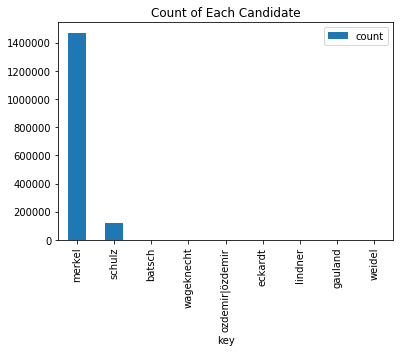

In [13]:
candidate_count.plot(kind='bar', 
                     title = "Count of Each Candidate",
                     #filename='cufflinks/tweet-per-candidate'
                     )
candidate_count

,count
key,
cdu,25718
csu,92426
spd,83258
linke,13235
gruene|grüne,2282
fdp,6876
afd,233492


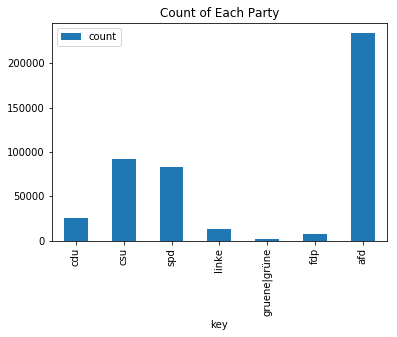

In [14]:

party_count.plot(kind = 'bar',
                 title = 'Count of Each Party')
party_count

## Calculating Primary Target of Tweets

In [16]:
tweets_df.loc[tweets_df['text'].str.contains('merkel', case=False), 'Candidate'] = 'merkel'
tweets_df.loc[tweets_df['text'].str.contains('schulz', case=False), 'Candidate'] = 'schulz'
tweets_df.loc[tweets_df['text'].str.contains('gauland', case=False), 'Candidate'] = 'gaulandweidel'
tweets_df.loc[tweets_df['text'].str.contains('weidel', case=False), 'Candidate'] = 'gaulandweidel'
tweets_df.loc[tweets_df['text'].str.contains('lindner|batsch|wageknecht|eckardt|ozdemir|özdemir', case=False), 'Candidate'] = 'others'

In [17]:
tweets_df.Candidate.value_counts()

merkel           1459999
schulz            120980
gaulandweidel       2341
others               674
Name: Candidate, dtype: int64

In [18]:
filtered_tweets_df = tweets_df.loc[tweets_df['Candidate'].isin(['merkel', 'schulz', 'gaulandweidel'])]

In [19]:
filtered_tweets_df.head()

,Q0,Q1,created_at,text,Candidate
2,NO,NOMOOD,2017-06-14 18:51:57,RT CORRUPT SYSTEM PRODUCES SUSTAINS BAD PEOPLE...,schulz
3,YES,UNKNOWN,2017-06-14 18:52:04,RT Merkel justifies her migrant policy by sayi...,merkel
4,NO,NOMOOD,2017-06-14 18:52:57,RT CORRUPT SYSTEM PRODUCES SUSTAINS BAD PEOPLE...,schulz
5,YES,UNKNOWN,2017-06-14 18:53:09,RT Macron is about to win a big mandate Merkel...,merkel
6,NO,NOMOOD,2017-06-14 18:53:12,RT CORRUPT SYSTEM PRODUCES SUSTAINS BAD PEOPLE...,schulz


## Frequency Distribution after Filtering

In [20]:
filtered_tweets_df.Q0.value_counts()

YES    1481803
NO      101517
Name: Q0, dtype: int64

In [21]:
filtered_tweets_df.Q1.value_counts()

UNKNOWN       1478131
NOMOOD         101517
POSITIVE         2017
NEGATIVE         1651
BOTH/MIXED          4
Name: Q1, dtype: int64

In [22]:
filtered_tweets_df.Candidate.value_counts()

merkel           1459999
schulz            120980
gaulandweidel       2341
Name: Candidate, dtype: int64

## Sampling 20% Data for Machine Learning

In [23]:
merkel_df = filtered_tweets_df[filtered_tweets_df.Candidate == 'merkel'].sample(frac=0.02)
schulz_df = filtered_tweets_df[filtered_tweets_df.Candidate == 'schulz'].sample(frac=0.2)
gw_df = filtered_tweets_df[filtered_tweets_df.Candidate == 'gaulandweidel']

In [24]:
sampled_df = pd.concat([merkel_df, schulz_df, gw_df])
sampled_df.columns = ['Relevant', 'Mood_of_Speaker', 'created_at', 'text', 'Candidate']

In [25]:
sampled_df.head()

,Relevant,Mood_of_Speaker,created_at,text,Candidate
1368205,YES,UNKNOWN,2017-08-20 20:41:03,RT MERKEL sentences journalist to prison for p...,merkel
1978600,YES,UNKNOWN,2017-10-01 18:00:02,RT German Chancellor Merkel holds phone call w...,merkel
521965,YES,UNKNOWN,2017-07-07 19:42:31,RT Putin made Merkel wait for 4 hours Obama fo...,merkel
868158,YES,UNKNOWN,2017-07-13 17:27:25,RT MERKEL S GERMANY Gangs Are Beating Up Immig...,merkel
1264858,YES,UNKNOWN,2017-08-15 00:35:29,Wrong Germany isn t in any atonement mode Merk...,merkel


## Sentiment Calculation



__TextBlob__ is a Python (2 and 3) library for processing textual data. It provides a consistent API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, __sentiment analysis__, and more.

__TextBlob__ aims to provide access to common text-processing operations through a familiar interface. You can treat TextBlob objects as if they were Python strings that learned how to do Natural Language Processing.

The __sentiment__ property returns a namedtuple of the form __Sentiment (polarity, subjectivity)__. The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [28]:
from textblob import TextBlob

def calculate_sentiment(tweet):
    '''
        Utility function to classify sentiment of passed tweets
        using textblob's sentiment method
    '''
    
    # create TextBlob object of passed tweet
    analysis = TextBlob(tweet)
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [29]:
def parse_data(tweets):
    parsed_tweets = []
    cnt = 0
    for tweet in tweets:
        cnt += 1
        # empty dictionary to store required params of a tweets
        parsed_tweet = {}
        # saving sentiment of tweet
        parsed_tweet['sentiment'] = calculate_sentiment(tweet)
        parsed_tweets.append(parsed_tweet)
    print ("sentiments computed for %d tweet" % cnt)
    return parsed_tweets

In [30]:
sample_with_sentiments_df = pd.DataFrame(parse_data(sampled_df['text'].tolist()))

sentiments computed for 55737 tweet


In [31]:
sample_with_sentiments_df = pd.concat([sampled_df[['text', 'Relevant', 'Mood_of_Speaker', 'created_at', 'Candidate']].reset_index(drop=True), 
                                      sample_with_sentiments_df], axis = 1)
sample_with_sentiments_df.head(10)

,text,Relevant,Mood_of_Speaker,created_at,Candidate,sentiment
0,RT MERKEL sentences journalist to prison for p...,YES,UNKNOWN,2017-08-20 20:41:03,merkel,neutral
1,RT German Chancellor Merkel holds phone call w...,YES,UNKNOWN,2017-10-01 18:00:02,merkel,neutral
2,RT Putin made Merkel wait for 4 hours Obama fo...,YES,UNKNOWN,2017-07-07 19:42:31,merkel,positive
3,RT MERKEL S GERMANY Gangs Are Beating Up Immig...,YES,UNKNOWN,2017-07-13 17:27:25,merkel,positive
4,Wrong Germany isn t in any atonement mode Merk...,YES,UNKNOWN,2017-08-15 00:35:29,merkel,negative
5,RT Acid attacks were non existent in Europe be...,YES,UNKNOWN,2017-09-18 08:36:54,merkel,neutral
6,RT Drumpf refused Merkel s handshake when they...,YES,UNKNOWN,2017-07-08 14:47:19,merkel,positive
7,RT Angela Merkel is all of us,YES,UNKNOWN,2017-07-08 17:09:57,merkel,neutral
8,business Why Angela Merkel is staying out of e...,YES,UNKNOWN,2017-08-23 05:22:18,merkel,neutral
9,RT Merkel says Trump administration s decision...,YES,UNKNOWN,2017-07-03 09:42:20,merkel,neutral


## Frequency Distribution after Sampling

In [32]:
sampled_df.Candidate.value_counts()

merkel           29200
schulz           24196
gaulandweidel     2341
Name: Candidate, dtype: int64

In [33]:
sampled_df.Relevant.value_counts()

YES    36056
NO     19681
Name: Relevant, dtype: int64

In [34]:
sampled_df.Mood_of_Speaker.value_counts()

UNKNOWN     35986
NOMOOD      19681
NEGATIVE       35
POSITIVE       35
Name: Mood_of_Speaker, dtype: int64

In [35]:
sample_with_sentiments_df.sentiment.value_counts()

neutral     24411
positive    22403
negative     8923
Name: sentiment, dtype: int64

In [36]:
sample_with_sentiments_df.groupby(["Candidate", "sentiment"]).size().reset_index(name="Count")

,Candidate,sentiment,Count
0,gaulandweidel,negative,307
1,gaulandweidel,neutral,1103
2,gaulandweidel,positive,931
3,merkel,negative,5081
4,merkel,neutral,13844
5,merkel,positive,10275
6,schulz,negative,3535
7,schulz,neutral,9464
8,schulz,positive,11197


In [37]:
sample_with_sentiments_df.groupby(["Relevant", "sentiment"]).size().reset_index(name="Count")

,Relevant,sentiment,Count
0,NO,negative,2984
1,NO,neutral,7302
2,NO,positive,9395
3,YES,negative,5939
4,YES,neutral,17109
5,YES,positive,13008


In [38]:
sample_with_sentiments_df = sample_with_sentiments_df.sort_values(by='created_at')
sample_with_sentiments_df.head(20)

,text,Relevant,Mood_of_Speaker,created_at,Candidate,sentiment
31259,RT CORRUPT SYSTEM PRODUCES SUSTAINS BAD PEOPLE...,NO,NOMOOD,2017-06-14 18:53:59,schulz,negative
45990,RT CORRUPT SYSTEM PRODUCES SUSTAINS BAD PEOPLE...,NO,NOMOOD,2017-06-14 18:54:52,schulz,negative
39212,RT CORRUPT SYSTEM PRODUCES SUSTAINS BAD PEOPLE...,NO,NOMOOD,2017-06-14 18:56:07,schulz,negative
42991,RT CORRUPT SYSTEM PRODUCES SUSTAINS BAD PEOPLE...,NO,NOMOOD,2017-06-14 18:56:43,schulz,negative
34525,RT CORRUPT SYSTEM PRODUCES SUSTAINS BAD PEOPLE...,NO,NOMOOD,2017-06-14 18:57:39,schulz,negative
21979,Merkel accused of RUINING Germany as New Year ...,YES,UNKNOWN,2017-06-14 18:57:46,merkel,positive
48019,RT Happiness is a warm puppy Charles M Schulz ...,NO,NOMOOD,2017-06-14 18:58:44,schulz,positive
26837,RT The Reign Of Terror and Downfall Of Liberti...,YES,UNKNOWN,2017-06-14 18:58:59,merkel,neutral
43740,RT CORRUPT SYSTEM PRODUCES SUSTAINS BAD PEOPLE...,NO,NOMOOD,2017-06-14 18:59:48,schulz,negative
3049,UPDATE 1 Germany s Merkel says EU ready to neg...,YES,UNKNOWN,2017-06-14 19:00:34,merkel,positive


## Machine Learning 

### Pre-processing 

#### Bags of words

The most intuitive way to do so is the bags of words representation:
   1. assign a fixed integer id to each word occurring in any document of the training set (for instance by building a dictionary from words to integer indices).
   2. for each document #i, count the number of occurrences of each word w and store it in X[i, j] as the value of feature #j where j is the index of word w in the dictionary

The bags of words representation implies that __n_features__ is the number of distinct words in the corpus: this number is typically larger than 100,000.

Fortunately, most values in X will be zeros since for a given document less than a couple thousands of distinct words will be used. For this reason we say that bags of words are typically high-dimensional sparse datasets. We can save a lot of memory by only storing the non-zero parts of the feature vectors in memory.

__scipy.sparse__ matrices are data structures that do exactly this, and __scikit-learn__ has built-in support for these structures.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.preprocessing import label_binarize

def data_preperation_for_machine_learning(data, x, y):
    X = data[x]
    y = data[y]

    # test_size is the percentage of events assigned to the test set
    # (remainder go into training) 
    # 70% Training and 30% Test dataset 
    features_train, features_test, labels_train, labels_test = train_test_split(X, y, 
                                                                                test_size=0.3, 
                                                                                random_state=42)

    # text vectorization--go from strings to lists of numbers
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
    features_train_transformed = vectorizer.fit_transform(features_train)
    features_test_transformed  = vectorizer.transform(features_test)

    # feature selection, because text is super high dimensional and 
    # can be really computationally chewy as a result
    selector = SelectPercentile(f_classif, percentile=20)
    selector.fit(features_train_transformed, labels_train)
    features_train_transformed = selector.transform(features_train_transformed).toarray()
    features_test_transformed  = selector.transform(features_test_transformed).toarray()
    
    return (features_train_transformed, features_test_transformed, labels_train, labels_test)

### Helper function was creating classification report 

In [40]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils.multiclass import unique_labels


def classification_report_to_dataframe(ground_truth, predictions):
    """
    Saves the classification report to dataframe using the pandas module.
    :param ground_truth: list: the true labels
    :param predictions: list: the predicted labels
    :return: dataframe
    """
    import pandas as pd

    # get unique labels / classes
    # - assuming all labels are in the sample at least once
    labels = unique_labels(ground_truth, predictions)

    # get results
    precision, recall, f_score, support = precision_recall_fscore_support(ground_truth,
                                                                          predictions,
                                                                          labels=labels,
                                                                          average=None)
    # a pandas way:
    results_pd = pd.DataFrame({"class": labels,
                               "precision": precision,
                               "recall": recall,
                               "fscore": f_score
                               })

    return results_pd

### Implementing Random Forest 

In [41]:
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

classifiers = ['NB','RF']

def machine_learning_algorithm(features_train_transformed, 
                               features_test_transformed, labels_train, labels_test):
    
    results = {}
    for classifier in classifiers:
        if classifier == 'RF':
            print("-------------------------------------------------")
            print("Implementing Random Forest")
            print("-------------------------------------------------")
            
            clf = RandomForestClassifier()

            t0 = time()
            clf.fit(features_train_transformed, labels_train)
            print ('Training time:', round(time()-t0, 3), 's')

            t0 = time()
            pred_train = clf.predict(features_train_transformed)
            print ('Predicting time for training data:', round(time()-t0, 3), 's')

            print ('Average Accuracy for training data:',accuracy_score(labels_train, pred_train)*100,'%')

            t0 = time()
            pred_test = clf.predict(features_test_transformed)
            print ('Predicting time for testing data:', round(time()-t0, 3), 's')

            print ('Average Accuracy for testing data:',accuracy_score(labels_test, pred_test)*100,'%')

            print ('Classification Report for testing data:') 
            results_rf = classification_report_to_dataframe(labels_test, pred_test)
            results_rf.index = results_rf['class']
            results_rf.drop(results_rf.columns[[0]], axis = 1, inplace = True)
            print (results_rf)
            results['RF'] = results_rf
        
        if classifier == 'NB':
            print("-------------------------------------------------")
            print("Implementing Naive Bayes")
            print("-------------------------------------------------")
            clf = GaussianNB()
            
            t0 = time()
            clf.fit(features_train_transformed, labels_train)
            print ('Training time:', round(time()-t0, 3), 's')

            t0 = time()
            pred_train = clf.predict(features_train_transformed)
            print ('Predicting time for training data:', round(time()-t0, 3), 's')

            print ('Average Accuracy for training data:',accuracy_score(labels_train, pred_train)*100,'%')

            t0 = time()
            pred_test = clf.predict(features_test_transformed)
            print ('Predicting time for testing data:', round(time()-t0, 3), 's')

            print ('Average Accuracy for testing data:',accuracy_score(labels_test, pred_test)*100,'%')

            print ('Classification Report for testing data:') 
            results_nb = classification_report_to_dataframe(labels_test, pred_test)
            results_nb.index = results_nb['class']
            results_nb.drop(results_nb.columns[[0]], axis = 1, inplace = True)
            print (results_nb)
            results['NB'] = results_nb
            
        
    return (results)

### Define Targets

In [42]:
targets = ['sentiment', 'Candidate', 'Relevant', 'Mood_of_Speaker']

### Perform Machine Learning

In [ ]:
metrics = {}
for target in targets:
    print("Target Variable is :", target)
    print("-------------------------------------------------")
    (features_train_transformed, 
     features_test_transformed, 
     labels_train, labels_test) = data_preperation_for_machine_learning(sample_with_sentiments_df, 'text', target)
    
    metrics[target] = machine_learning_algorithm(features_train_transformed,features_test_transformed,labels_train,labels_test)
    
    print("-------------------------------------------------")

Target Variable is : sentiment
-------------------------------------------------
-------------------------------------------------
Implementing Naive Bayes
-------------------------------------------------
Training time: 3.155 s
Predicting time for training data: 29.501 s
Average Accuracy for training data: 87.65090349865436 %
Predicting time for testing data: 2.413 s
Average Accuracy for testing data: 83.83566559024041 %
Classification Report for testing data:
            fscore  precision    recall
class                                  
negative  0.703509   0.579221  0.895706
neutral   0.909314   0.914552  0.904136
positive  0.826399   0.929048  0.744176
-------------------------------------------------
Implementing Random Forest
-------------------------------------------------
Training time: 56.358 s
Predicting time for training data: 1.084 s
Average Accuracy for training data: 99.58990132000513 %
Predicting time for testing data: 0.435 s
Average Accuracy for testing data: 94.3906